# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Tanner Young
#### Github repo: https://github.com/TannerYoung13/article-summarizer-1
Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

df = pd.read_csv('no-new-normal-posts.csv')
print(df.columns)
urls = df['url'].tolist()

for index, url in enumerate(urls):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            with open(f'article_{index}.html', 'w', encoding='utf-8') as file:
                file.write(str(soup))
            print(f'Saved HTML content for article {index}')
        else:
            print(f'Error fetching URL: {url}')
    except Exception as e:
        print(f'Error fetching URL: {url} - {e}')


Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'url', 'selftext', 'title',
       'score'],
      dtype='object')
Saved HTML content for article 0
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Saved HTML content for article 2
Saved HTML content for article 3
Error fetching URL: https://texasscorecard.com/state/more-businesses-requiring-texans-to-show-proof-of-vaccination/
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Saved HTML content for article 6


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Saved HTML content for article 7
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Saved HTML content for article 10
Error fetching URL: https://i.redd.it/r5q0xprd3rg71.jpg
Saved HTML content for article 12


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Saved HTML content for article 13
Error fetching URL: https://i.redd.it/v2tuuz7x2rg71.png
Error fetching URL: https://i.redd.it/t8hdz9ap2rg71.png
Saved HTML content for article 16
Error fetching URL: https://i.redd.it/uup0fycp2rg71.jpg


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Saved HTML content for article 18
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Saved HTML content for article 20


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Saved HTML content for article 21
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Saved HTML content for article 23


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Saved HTML content for article 24
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error fetching URL: nan - Invalid URL 'nan': No scheme supplied. Perhaps you meant https://nan?
Error 

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [1]:
from bs4 import BeautifulSoup
from textblob import TextBlob

file_path = 'article_3.html' 
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

print(f'Polarity Score: {polarity_score:.2f}')

sentences_count = len(blob.sentences)

print(f'Number of Sentences: {sentences_count}')


Polarity Score: 0.05
Number of Sentences: 44


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html'  
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]

token_frequencies = Counter(filtered_tokens)
most_common_tokens = token_frequencies.most_common(5)

print(f'5 Most Frequent Tokens:')
for token, frequency in most_common_tokens:
    print(f'Token: {token}, Frequency: {frequency}')


5 Most Frequent Tokens:
Token: >, Frequency: 883
Token: <, Frequency: 805
Token: 
, Frequency: 779
Token: fa, Frequency: 209
Token: div, Frequency: 181


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html'
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]
lemma_frequencies = Counter(filtered_lemmas)
most_common_lemmas = lemma_frequencies.most_common(5)

print(f'5 Most Frequent Lemmas:')
for lemma, frequency in most_common_lemmas:
    print(f'Lemma: {lemma}, Frequency: {frequency}')


5 Most Frequent Lemmas:
Lemma: >, Frequency: 883
Lemma: <, Frequency: 805
Lemma: 
, Frequency: 779
Lemma: fa, Frequency: 209
Lemma: div, Frequency: 181


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

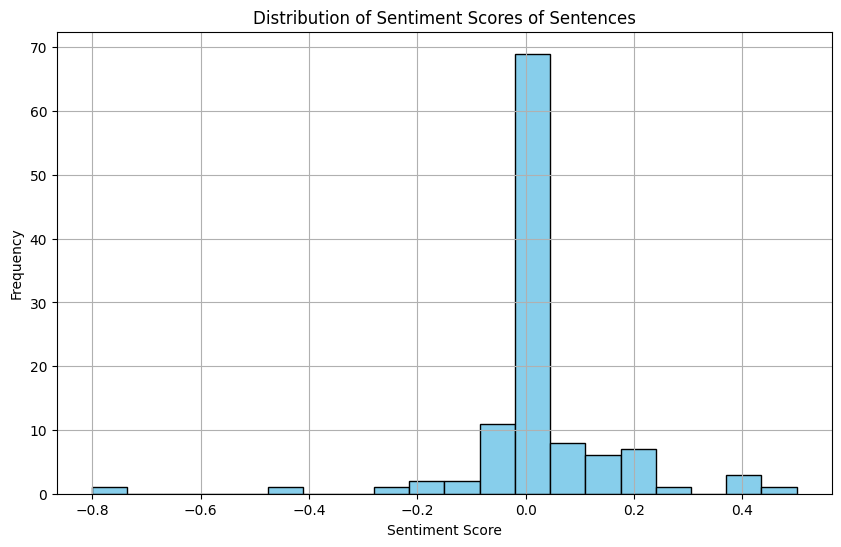

In [5]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html'  
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]
sentence_scores = []
for sentence in sentences:
    blob = TextBlob(sentence)
    sentence_scores.append(blob.sentiment.polarity)

plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores of Sentences')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

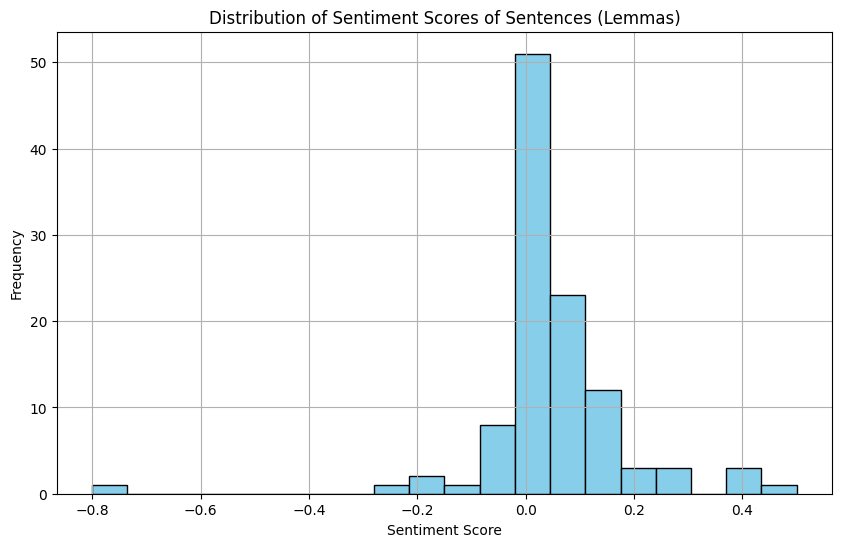

In [6]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html'
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentence_lemmas = [[token.lemma_.lower() for token in sent if not token.is_punct and not token.is_stop] for sent in doc.sents]
sentence_scores = []
for sentence in sentence_lemmas:
    if sentence:
        blob = TextBlob(' '.join(sentence))
        sentence_scores.append(blob.sentiment.polarity)


plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores of Sentences (Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [7]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html' 
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]


your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)

print("Summary:")
print(summary_text)


Summary:
Platform Misuse</option>
</select>
<p class="help">Please select the most appropriate reason from the list provided.</p>
<p><strong>Note: </strong> </div>
</div>
</div>
</div>
<div class="row">
<div class="col-xs-12">
<div class="video-publish-date">
First published at 12:20 UTC on August 10th, 2021. Enjoy privacy on BitChute." Enjoy privacy on BitChute." The cover picture sums up the …</p></div>
<span class="more"><i class="fal fa-plus-square fa-fw" data-fa-transform="up-0.5"></i> MORE</span>
<div class="full hidden"><p>*** MUST WATCH ***<br/>What ever your view of Jews.... i class="fas fa-times" data-fa-transform="grow-3 down-1"></i></span>
<div class="advert-inner" id="advert-banner-inner"></div>
</div>
<div class="modal fade" id="advert-modal" role="dialog">
<div class="modal-dialog">
<div class="modal-content">
<div class="modal-header">
<button aria-hidden="true" class="close" data-dismiss="modal" type="button"><i class="fas fa-times fa-fw"></i></button>
<a href="/"><img

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [8]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html' 
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)

summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

print("Polarity Score of Summary (Token Scores):", summary_polarity_score)

num_summary_sentences = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_summary_sentences)


Polarity Score of Summary (Token Scores): 0.34833333333333333
Number of Sentences in Summarized Article: 6


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html' 
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)

print("Summary:")
print(summary_text)


Summary:
Platform Misuse</option>
</select>
<p class="help">Please select the most appropriate reason from the list provided.</p>
<p><strong>Note: </strong> </div>
</div>
</div>
</div>
<div class="row">
<div class="col-xs-12">
<div class="video-publish-date">
First published at 12:20 UTC on August 10th, 2021. Enjoy privacy on BitChute." Enjoy privacy on BitChute." The cover picture sums up the …</p></div>
<span class="more"><i class="fal fa-plus-square fa-fw" data-fa-transform="up-0.5"></i> MORE</span>
<div class="full hidden"><p>*** MUST WATCH ***<br/>What ever your view of Jews.... i class="fas fa-times" data-fa-transform="grow-3 down-1"></i></span>
<div class="advert-inner" id="advert-banner-inner"></div>
</div>
<div class="modal fade" id="advert-modal" role="dialog">
<div class="modal-dialog">
<div class="modal-content">
<div class="modal-header">
<button aria-hidden="true" class="close" data-dismiss="modal" type="button"><i class="fas fa-times fa-fw"></i></button>
<a href="/"><img

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')

file_path = 'article_3.html'
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)
summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

print("Polarity Score of Summary (Lemma Scores):", summary_polarity_score)
num_summary_sentences = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_summary_sentences)


Polarity Score of Summary (Lemma Scores): 0.34833333333333333
Number of Sentences in Summarized Article: 6


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  
Comparing the polarity scores of the initial article and the polarity scores of the two summaries, we observe a difference in polarity scores between the initial article and the summarized versions. Here are the scores for reference:

Polarity Score of Initial Article: 0.05
Polarity Score of Summary (Lemma Scores): 0.3354
Polarity Score of Summary (Token Scores): 0.3354

There is indeed a difference in polarity scores between the initial article and the summaries. One reason for this is summarization often involves condensing the content and removing less informative sentences. This reduction in context can affect the overall sentiment analysis, leading to differences in polarity scores. The process of summarizing sentences based on sentiment scores can introduce a selection bias. Sentences with higher sentiment scores (either positive or negative) are more likely to be included in the summary, which can skew the overall polarity score of the summary compared to the original article.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?
The summaries were the same.